# Selection

This notebook shows predictions for nueCCQE-like events at MiniBooNE.

Since without a detector simulation the selection criteria can only be approximated, we explore different selection analysis methods, implementing for example the method in Kelly\&Kopp (https://arxiv.org/abs/2210.08021)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from importlib.resources import open_text

import DarkNews as dn
from DarkNews import GenLauncher
from DarkNews import Cfourvec as Cfv
from DarkNews import plot_tools as pt


In [3]:
import fastbnb as ta
from fastbnb import decayer
from fastbnb import analysis
from fastbnb import fastmc

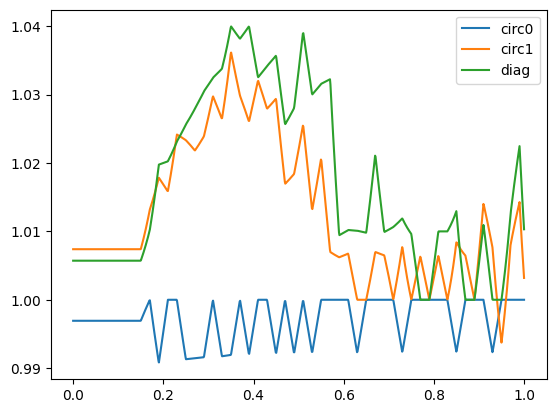

In [4]:
for cut in ['circ0', 'circ1', 'diag']:
    f_1cut = fastmc.get_r_cut_func(cut=cut, uncertainty_case='1cut100samples', extrapolate=True)
    f_100cut = fastmc.get_r_cut_func(cut=cut, uncertainty_case='100cut1sample', extrapolate=True)

    x = np.linspace(0,1, 1000)

    plt.plot(x, f_100cut(x)/f_1cut(x), label=cut)
plt.legend()

### Generate events for MiniBooNE FHC

In [5]:
common_kwargs={'loglevel': 'WARNING', 'HNLtype': 'dirac', 'neval': 1e3, 'experiment': 'miniboone_fhc'}

In [6]:
kwargs_1={'m5': 0.150, 'm4': 0.001, 'mzprime': 0.03,'Umu5': 3.5e-5, 'Umu4': 2.5e-5, 'epsilon': 1e-3, 'path': 'data/example_1'}
kwargs_2={'m5': 0.200, 'm4': 0.001, 'mzprime': 0.150,'Umu5': 3.5e-5, 'Umu4': 2.5e-5, 'epsilon': 1e-3, 'path': 'data/example_2'}
kwargs_3={'m5': 0.400, 'm4': 0.001, 'mzprime': 0.200,'Umu5': 3.5e-5, 'Umu4': 2.5e-5, 'epsilon': 1e-3, 'path': 'data/example_3'}

df_1 = GenLauncher(**kwargs_1, **common_kwargs).run()
df_2 = GenLauncher(**kwargs_2, **common_kwargs).run()
df_3 = GenLauncher(**kwargs_3, **common_kwargs).run()

kwargs_4={'m5': 0.150, 'm4': 0.001, 'mzprime': 1.25,'Umu5': 3.5e-5, 'Umu4': 2.5e-5, 'epsilon': 1e-3, 'path': 'data/example_4'}
kwargs_5={'m5': 0.200, 'm4': 0.001, 'mzprime': 1.25,'Umu5': 3.5e-5, 'Umu4': 2.5e-5, 'epsilon': 1e-3, 'path': 'data/example_5'}
kwargs_6={'m5': 0.400, 'm4': 0.001, 'mzprime': 1.25,'Umu5': 3.5e-5, 'Umu4': 2.5e-5, 'epsilon': 1e-3, 'path': 'data/example_6'}

df_4 = GenLauncher(**kwargs_4, **common_kwargs).run()
df_5 = GenLauncher(**kwargs_5, **common_kwargs).run()
df_6 = GenLauncher(**kwargs_6, **common_kwargs).run()

Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.
Directory tree for this run already exists. Overriding it.


# Decay selection

We then take the generated events, and pass them through a decay selection code, to select only events with e+e- pairs inside the fiducial volume of the detector.

In [7]:
df_decay_1 = decayer.decay_selection(df_1, l_decay_proper_cm=df_1.attrs['N5_ctau0'], experiment='miniboone')
df_decay_2 = decayer.decay_selection(df_2, l_decay_proper_cm=df_2.attrs['N5_ctau0'], experiment='miniboone')

In [8]:
# %%prun
df_decay_3 = decayer.decay_selection(df_3, l_decay_proper_cm=df_3.attrs['N5_ctau0'], experiment='miniboone')
df_decay_4 = decayer.decay_selection(df_4, l_decay_proper_cm=df_4.attrs['N5_ctau0'], experiment='miniboone')

In [9]:
# %%prun
df_decay_5 = decayer.decay_selection(df_5, l_decay_proper_cm=df_5.attrs['N5_ctau0'], experiment='miniboone')
df_decay_6 = decayer.decay_selection(df_6, l_decay_proper_cm=df_6.attrs['N5_ctau0'], experiment='miniboone')

# Signal selection

The fiducialized events are then put through the signal selection process. Only events compatible with the MiniBooNE nueCCQE events remain.

In [10]:
df_analysis_1   = analysis.reco_nueCCQElike_Enu(df_decay_1, cut='circ1')
df_analysis_2   = analysis.reco_nueCCQElike_Enu(df_decay_2, cut='circ1')
df_analysis_3   = analysis.reco_nueCCQElike_Enu(df_decay_3, cut='circ1')
df_analysis_4   = analysis.reco_nueCCQElike_Enu(df_decay_4, cut='circ1')
df_analysis_5   = analysis.reco_nueCCQElike_Enu(df_decay_5, cut='circ1')
df_analysis_6   = analysis.reco_nueCCQElike_Enu(df_decay_6, cut='circ1')

/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/fastbnb/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e) * costheta
/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/fastbnb/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e) * costheta
/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/fastbnb/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e) * costheta
/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/fastbnb/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e) * costheta
/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/fastbnb/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e) * costheta
/Users/matheushoster

In [15]:
from fastbnb import fit_functions
print(fit_functions.chi2_MiniBooNE_2020_3p1(df_1, umu4=1e-5))
print(fit_functions.chi2_MiniBooNE_2020_3p1(df_analysis_1, umu4=1e-5))

246.39559014158507
248.67677238267387


/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/fastbnb/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e) * costheta
/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/fastbnb/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e) * costheta


In [16]:
df_analysis_1_circ0   = analysis.reco_nueCCQElike_Enu(df_decay_1, cut='circ0')
df_analysis_1_diag   = analysis.reco_nueCCQElike_Enu(df_decay_1, cut='diag')
df_analysis_1_invmass   = analysis.reco_nueCCQElike_Enu(df_decay_1, cut='invmass')

/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/fastbnb/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e) * costheta
/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/fastbnb/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e) * costheta


In [17]:
df_analysis_2.columns.levels[0]

Index(['P_decay_N_daughter', 'P_decay_N_parent', 'P_decay_ell_minus',
       'P_decay_ell_plus', 'P_projectile', 'P_recoil', 'P_target',
       'w_decay_rate_0', 'w_decay_rate_1', 'w_event_rate', 'target_pdgid',
       'projectile_pdgid', 'w_flux_avg_xsec', 'target', 'scattering_regime',
       'helicity', 'underlying_process', 'h_projectile', 'h_parent',
       'pos_scatt', 'pos_prod', 'pos_decay', 'index', 'w_pre_decay',
       'reco_Enu', 'reco_w', 'reco_Evis', 'reco_theta_beam',
       'reco_costheta_beam', 'reco_eff'],
      dtype='object')

/usr/local/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


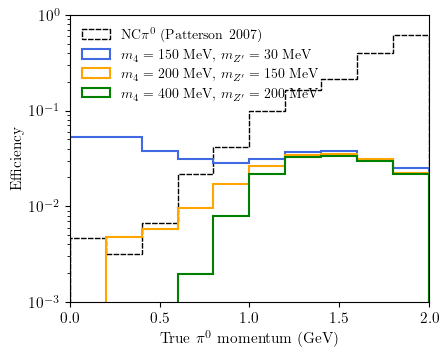

In [253]:
fig, ax = pt.std_fig()

VAR_1 = np.sqrt((df_analysis_1['P_decay_ell_plus','0'] + df_analysis_1['P_decay_ell_minus','0'])**2 - 0.135**2)
VAR_2 = np.sqrt((df_analysis_2['P_decay_ell_plus','0'] + df_analysis_2['P_decay_ell_minus','0'])**2 - 0.135**2)
VAR_3 = np.sqrt((df_analysis_3['P_decay_ell_plus','0'] + df_analysis_3['P_decay_ell_minus','0'])**2 - 0.135**2)
VAR_4 = np.sqrt((df_analysis_4['P_decay_ell_plus','0'] + df_analysis_4['P_decay_ell_minus','0'])**2 - 0.135**2)
VAR_5 = np.sqrt((df_analysis_5['P_decay_ell_plus','0'] + df_analysis_5['P_decay_ell_minus','0'])**2 - 0.135**2)
VAR_6 = np.sqrt((df_analysis_6['P_decay_ell_plus','0'] + df_analysis_6['P_decay_ell_minus','0'])**2 - 0.135**2)

ALPHA = 0.3
LW = 1.5

bins = np.linspace(0.0, 2.0, 11, endpoint=True)# np.linspace(0.0, 2.0, 11, endpoint=True)
binc = (bins[:-1]+bins[1:])/2
patterson_eff = np.genfromtxt(open_text('fastbnb.include.Patterson_tools', 'pi0_nueCCQE_eff.dat'))
ax.hist(binc, bins= bins, weights=patterson_eff, histtype='step', color='black', ls=(1,(4,1)), label=fr'NC$\pi^0$ (Patterson 2007)')

hist_1_t, _ = np.histogram(VAR_1, bins = bins, weights = df_analysis_1['w_event_rate']/df_analysis_1['w_event_rate'].sum())
hist_2_t, _ = np.histogram(VAR_2, bins = bins, weights = df_analysis_2['w_event_rate']/df_analysis_2['w_event_rate'].sum())
hist_3_t, _ = np.histogram(VAR_3, bins = bins, weights = df_analysis_3['w_event_rate']/df_analysis_3['w_event_rate'].sum())

hist_1, _ = np.histogram(VAR_1, bins = bins, weights = df_analysis_1['reco_w']/df_analysis_1['w_event_rate'].sum())
hist_2, _ = np.histogram(VAR_2, bins = bins, weights = df_analysis_2['reco_w']/df_analysis_2['w_event_rate'].sum())
hist_3, _ = np.histogram(VAR_3, bins = bins, weights = df_analysis_3['reco_w']/df_analysis_3['w_event_rate'].sum())


eps_1 = df_analysis_1['reco_w'].sum()/df_analysis_1['w_event_rate'].sum()
eps_2 = df_analysis_2['reco_w'].sum()/df_analysis_2['w_event_rate'].sum()
eps_3 = df_analysis_3['reco_w'].sum()/df_analysis_3['w_event_rate'].sum()

_ = ax.hist(binc, bins=bins, weights=hist_1/(hist_1_t+1e-6), histtype='step', edgecolor='royalblue', lw=LW, label=r'$m_4 = 150$~MeV, $m_{Z^\prime} = 30$~MeV')
_ = ax.hist(binc, bins=bins, weights=hist_2/(hist_2_t+1e-6), histtype='step', edgecolor='orange', lw=LW, label=r'$m_4 = 200$~MeV, $m_{Z^\prime} = 150$~MeV')
_ = ax.hist(binc, bins=bins, weights=hist_3/(hist_3_t+1e-6), histtype='step', edgecolor='green', lw=LW, label=r'$m_4 = 400$~MeV, $m_{Z^\prime} = 200$~MeV')

ax.legend(loc='upper left', ncol=1, fontsize=10)
ax.set_xlabel(r'True $\pi^0$ momentum (GeV)')
ax.set_ylabel(r'Efficiency')
ax.set_xlim(0,np.max(bins))
ax.set_ylim(1e-3,1)
ax.set_yscale('log')
fig.savefig('plots/Comparison_of_eff_with_pi0_lightZ.pdf', bbox_inches='tight')

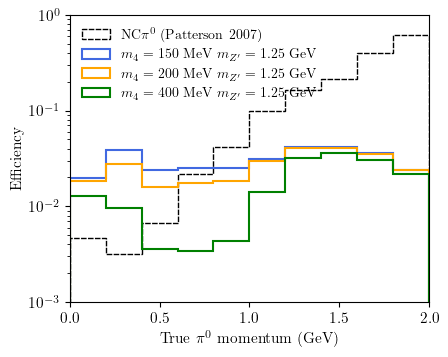

In [252]:
fig, ax = pt.std_fig()

bins = np.linspace(0.0, 2.0, 11, endpoint=True)# np.linspace(0.0, 2.0, 11, endpoint=True)
binc = (bins[:-1]+bins[1:])/2
patterson_eff = np.genfromtxt(open_text('fastbnb.include.Patterson_tools', 'pi0_nueCCQE_eff.dat'))
ax.hist(binc, bins= bins, weights=patterson_eff, histtype='step', color='black', ls=(1,(4,1)), label=fr'NC$\pi^0$ (Patterson 2007)')

hist_4_t, _ = np.histogram(VAR_4, bins = bins, weights = df_analysis_4['w_event_rate']/np.sum(df_analysis_4['w_event_rate']))
hist_5_t, _ = np.histogram(VAR_5, bins = bins, weights = df_analysis_5['w_event_rate']/np.sum(df_analysis_5['w_event_rate']))
hist_6_t, _ = np.histogram(VAR_6, bins = bins, weights = df_analysis_6['w_event_rate']/np.sum(df_analysis_6['w_event_rate']))
hist_4, _ = np.histogram(VAR_4, bins = bins, weights = df_analysis_4['reco_w']/np.sum(df_analysis_4['w_event_rate']))
hist_5, _ = np.histogram(VAR_5, bins = bins, weights = df_analysis_5['reco_w']/np.sum(df_analysis_5['w_event_rate']))
hist_6, _ = np.histogram(VAR_6, bins = bins, weights = df_analysis_6['reco_w']/np.sum(df_analysis_6['w_event_rate']))

eps_4 = df_analysis_4['reco_w'].sum()/df_analysis_4['w_event_rate'].sum()
eps_5 = df_analysis_5['reco_w'].sum()/df_analysis_5['w_event_rate'].sum()
eps_6 = df_analysis_6['reco_w'].sum()/df_analysis_6['w_event_rate'].sum()

_ = ax.hist(binc, bins = bins, weights=hist_4/hist_4_t, histtype='step', edgecolor='royalblue', lw=LW, label=r'$m_4 = 150$~MeV $m_{Z^\prime} = 1.25$~GeV')
_ = ax.hist(binc, bins = bins, weights=hist_5/hist_5_t, histtype='step', edgecolor='orange', lw=LW, label=r'$m_4 = 200$~MeV $m_{Z^\prime} = 1.25$~GeV')
_ = ax.hist(binc, bins = bins, weights=hist_6/hist_6_t, histtype='step', edgecolor='green', lw=LW, label=r'$m_4 = 400$~MeV $m_{Z^\prime} = 1.25$~GeV')

# ax.set_title(r"$m_{Z^\prime} = 1.25$~GeV", fontsize=11)

ax.legend(loc='upper left', ncol=1, fontsize=10)
ax.set_xlabel(r'True $\pi^0$ momentum (GeV)')
ax.set_ylabel(r'Efficiency')
ax.set_xlim(0,np.max(bins))
ax.set_ylim(1e-3,1)
ax.set_yscale('log')
fig.savefig('plots/Comparison_of_eff_w_pi0_heavyZ.pdf', bbox_inches='tight')

#### In reco variables

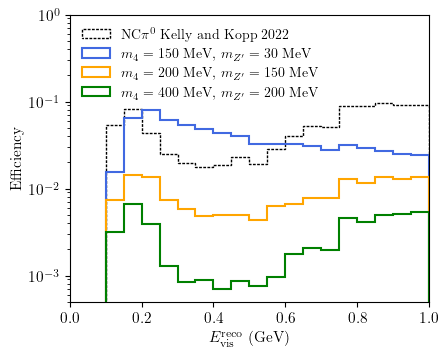

In [251]:
fig, ax = pt.std_fig()
# VAR_1 = df_analysis_1['P_decay_ell_plus','0'] + df_analysis_1['P_decay_ell_minus','0']
# VAR_2 = df_analysis_2['P_decay_ell_plus','0'] + df_analysis_2['P_decay_ell_minus','0']
# VAR_3 = df_analysis_3['P_decay_ell_plus','0'] + df_analysis_3['P_decay_ell_minus','0']
# VAR_4 = df_analysis_4['P_decay_ell_plus','0'] + df_analysis_4['P_decay_ell_minus','0']
# VAR_5 = df_analysis_5['P_decay_ell_plus','0'] + df_analysis_5['P_decay_ell_minus','0']
# VAR_6 = df_analysis_6['P_decay_ell_plus','0'] + df_analysis_6['P_decay_ell_minus','0']


VAR_1 = df_analysis_1['reco_Evis']
VAR_2 = df_analysis_2['reco_Evis']
VAR_3 = df_analysis_3['reco_Evis']
VAR_4 = df_analysis_4['reco_Evis']
VAR_5 = df_analysis_5['reco_Evis']
VAR_6 = df_analysis_6['reco_Evis']

ALPHA = 0.3
LW = 1.5

bins = np.linspace(0.0, 1.0, 21, endpoint=True)# np.linspace(0.0, 2.0, 11, endpoint=True)
binc = (bins[:-1]+bins[1:])/2
# patterson_eff = np.genfromtxt(open_text('fastbnb.include.Patterson_tools', 'pi0_nueCCQE_eff.dat'))
# ax.hist(binc, bins= bins, weights=patterson_eff, histtype='step', color='black', ls=(1,(4,1)), label=fr'$\pi^0$ events ($\epsilon = {np.mean(patterson_eff)*100:.1f}\%$)')

kelly_bins = np.linspace(0.0, 1.0, 21, endpoint=True)
kelly_circ1_eff = np.genfromtxt(open_text('fastbnb.include.pi0_tools', 'pi0_efficiency_circ1.dat'))
ax.hist(kelly_circ1_eff[:,0], bins= kelly_bins, weights=kelly_circ1_eff[:,1], histtype='step', color='black', ls=(1,(2,1)), label=fr'NC$\pi^0$ Kelly and Kopp 2022')

hist_1_t, _ = np.histogram(VAR_1, bins = bins, weights = df_analysis_1['w_event_rate']/df_analysis_1['w_event_rate'].sum())
hist_2_t, _ = np.histogram(VAR_2, bins = bins, weights = df_analysis_2['w_event_rate']/df_analysis_2['w_event_rate'].sum())
hist_3_t, _ = np.histogram(VAR_3, bins = bins, weights = df_analysis_3['w_event_rate']/df_analysis_3['w_event_rate'].sum())

hist_1, _ = np.histogram(VAR_1, bins = bins, weights = df_analysis_1['reco_w']/df_analysis_1['w_event_rate'].sum())
hist_2, _ = np.histogram(VAR_2, bins = bins, weights = df_analysis_2['reco_w']/df_analysis_2['w_event_rate'].sum())
hist_3, _ = np.histogram(VAR_3, bins = bins, weights = df_analysis_3['reco_w']/df_analysis_3['w_event_rate'].sum())


eps_1 = df_analysis_1['reco_w'].sum()/df_analysis_1['w_event_rate'].sum()
eps_2 = df_analysis_2['reco_w'].sum()/df_analysis_2['w_event_rate'].sum()
eps_3 = df_analysis_3['reco_w'].sum()/df_analysis_3['w_event_rate'].sum()

_ = ax.hist(binc, bins=bins, weights=hist_1/(hist_1_t+1e-6), histtype='step', edgecolor='royalblue', lw=LW, label=r'$m_4 = 150$~MeV, $m_{Z^\prime} = 30$~MeV')
_ = ax.hist(binc, bins=bins, weights=hist_2/(hist_2_t+1e-6), histtype='step', edgecolor='orange', lw=LW, label=r'$m_4 = 200$~MeV, $m_{Z^\prime} = 150$~MeV')
_ = ax.hist(binc, bins=bins, weights=hist_3/(hist_3_t+1e-6), histtype='step', edgecolor='green', lw=LW, label=r'$m_4 = 400$~MeV, $m_{Z^\prime} = 200$~MeV')

ax.legend(loc='upper left', ncol=1, fontsize=10)
ax.set_xlabel(r'$E_{\rm vis}^{\rm reco}$ (GeV)')
ax.set_ylabel(r'Efficiency')
ax.set_xlim(0,np.max(bins))
ax.set_ylim(0.5e-3,1)
ax.set_yscale('log')
fig.savefig('plots/Comparison_of_eff_with_pi0_lightZ_reco.pdf', bbox_inches='tight')

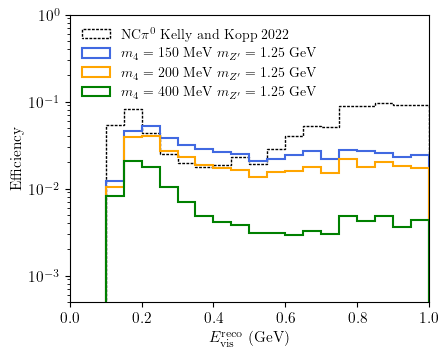

In [250]:
fig, ax = pt.std_fig()

bins = np.linspace(0.0, 1.0, 21, endpoint=True)# np.linspace(0.0, 2.0, 11, endpoint=True)
binc = (bins[:-1]+bins[1:])/2

kelly_bins = np.linspace(0.0, 1.0, 21, endpoint=True)
kelly_circ1_eff = np.genfromtxt(open_text('fastbnb.include.pi0_tools', 'pi0_efficiency_circ1.dat'))
ax.hist(kelly_circ1_eff[:,0], bins= kelly_bins, weights=kelly_circ1_eff[:,1], histtype='step', color='black', ls=(1,(2,1)), label=fr'NC$\pi^0$ Kelly and Kopp 2022')

hist_4_t, _ = np.histogram(VAR_4, bins = bins, weights = df_analysis_4['w_event_rate']/np.sum(df_analysis_4['w_event_rate']))
hist_5_t, _ = np.histogram(VAR_5, bins = bins, weights = df_analysis_5['w_event_rate']/np.sum(df_analysis_5['w_event_rate']))
hist_6_t, _ = np.histogram(VAR_6, bins = bins, weights = df_analysis_6['w_event_rate']/np.sum(df_analysis_6['w_event_rate']))
hist_4, _ = np.histogram(VAR_4, bins = bins, weights = df_analysis_4['reco_w']/np.sum(df_analysis_4['w_event_rate']))
hist_5, _ = np.histogram(VAR_5, bins = bins, weights = df_analysis_5['reco_w']/np.sum(df_analysis_5['w_event_rate']))
hist_6, _ = np.histogram(VAR_6, bins = bins, weights = df_analysis_6['reco_w']/np.sum(df_analysis_6['w_event_rate']))

eps_4 = df_analysis_4['reco_w'].sum()/df_analysis_4['w_event_rate'].sum()
eps_5 = df_analysis_5['reco_w'].sum()/df_analysis_5['w_event_rate'].sum()
eps_6 = df_analysis_6['reco_w'].sum()/df_analysis_6['w_event_rate'].sum()

_ = ax.hist(binc, bins = bins, weights=hist_4/hist_4_t, histtype='step', edgecolor='royalblue', lw=LW, label=r'$m_4 = 150$~MeV $m_{Z^\prime} = 1.25$~GeV')
_ = ax.hist(binc, bins = bins, weights=hist_5/hist_5_t, histtype='step', edgecolor='orange', lw=LW, label=r'$m_4 = 200$~MeV $m_{Z^\prime} = 1.25$~GeV')
_ = ax.hist(binc, bins = bins, weights=hist_6/hist_6_t, histtype='step', edgecolor='green', lw=LW, label=r'$m_4 = 400$~MeV $m_{Z^\prime} = 1.25$~GeV')

# ax.set_title(r"$m_{Z^\prime} = 1.25$~GeV", fontsize=11)

ax.legend(loc='upper left', ncol=1, fontsize=10)
ax.set_xlabel(r'$E_{\rm vis}^{\rm reco}$ (GeV)')
ax.set_ylabel(r'Efficiency')
ax.set_xlim(0,np.max(bins))
ax.set_ylim(0.5e-3,1)
ax.set_yscale('log')
fig.savefig('plots/Comparison_of_eff_w_pi0_heavyZ_reco.pdf', bbox_inches='tight')

ValueError: weights should have the same shape as a.

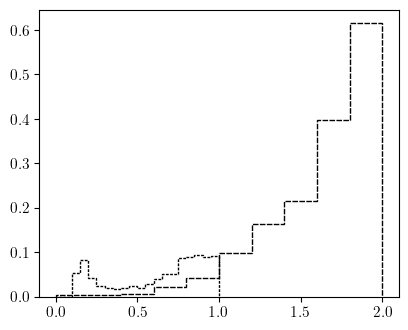

In [255]:
df = df_analysis_2

fig, ax = pt.std_fig()
VAR = df['P_decay_ell_plus','0'] + df['P_decay_ell_minus','0']
ALPHA = 0.3
LW = 1.5

bins = np.linspace(0.0, 2.0, 11, endpoint=True)
binc = (bins[:-1]+bins[1:])/2
patterson_eff = np.genfromtxt(open_text('fastbnb.include.Patterson_tools', 'pi0_nueCCQE_eff.dat'))
ax.hist(binc, bins= bins, weights=patterson_eff, histtype='step', color='black', ls=(1,(4,1)), label=fr'$\pi^0$ events ($\epsilon = {np.mean(patterson_eff)*100:.1f}\%$)')

# kelly_bins = np.linspace(0.0, 1.0, 21, endpoint=True)
# kelly_circ1_eff = np.genfromtxt(open_text('fastbnb.include.pi0_tools', 'pi0_efficiency_circ1.dat'))
# ax.hist(kelly_circ1_eff[:,0], bins= kelly_bins, weights=kelly_circ1_eff[:,1], histtype='step', color='black', ls=(1,(2,1)), label=fr'$\pi^0$ events ($\epsilon = {np.mean(kelly_circ1_eff[:,1])*100:.1f}\%$)')

histOriginal, _ = np.histogram(VAR, bins = bins, weights = df_analysis_1['w_event_rate']/np.sum(df_analysis_1['w_event_rate']))
histCutMee, _ = np.histogram(VAR, bins = bins, weights = df_analysis_1_invmass['reco_w']/np.sum(df_analysis_1_invmass['w_event_rate']))
histCutCirc0, _ = np.histogram(VAR, bins = bins, weights = df_analysis_1_circ0['reco_w']/np.sum(df_analysis_1_circ0['w_event_rate']))
histCutDiag, _ = np.histogram(VAR, bins = bins, weights=df_analysis_1_diag['reco_w']/np.sum(df_analysis_1_diag['w_event_rate']))
histCutCirc1, _ = np.histogram(VAR, bins = bins, weights = df_analysis_1['reco_w']/np.sum(df_analysis_1['w_event_rate']))

_ = ax.hist(binc, bins = bins, weights=histCutMee/histOriginal, histtype='step', facecolor = 'None', edgecolor='green', lw=LW, label=r'$m_{ee}$ cut'+fr' $(\epsilon = {eff_CutMee*100:.1f}\%$)')
_ = ax.hist(binc, bins = bins, weights=histCutCirc0/histOriginal, histtype='step', facecolor = 'None', edgecolor='navajowhite', lw=LW, label=r'$r_{\rm Circle 0}$'+fr' $(\epsilon = {eff_CutCirc0*100:.1f}\%$)')
_ = ax.hist(binc, bins = bins, weights=histCutDiag/histOriginal, histtype='step', facecolor = 'None', edgecolor='violet', lw=LW, label=r'$r_{\rm Diagonal}$'+fr' $(\epsilon = {eff_CutDiag*100:.1f}\%$)')
_ = ax.hist(binc, bins = bins, weights=histCutCirc1/histOriginal, histtype='step', facecolor = 'None', edgecolor='steelblue', lw=LW, label=r'$r_{\rm Circle 1}$'+fr' $(\epsilon = {eff_CutCirc1*100:.1f}\%$)')

ax.legend(loc='upper left', ncol=2)
ax.set_xlabel(r'$E_{e^+} + E_{e^-}$ (GeV)')
ax.set_ylabel(r'Efficiency')
ax.set_xlim(0,2)
ax.set_ylim(0.001,1)
ax.set_yscale('log')
fig.savefig('plots/Comparison_of_eff_for_pi0.pdf', bbox_inches='tight')

In [26]:
df = df_decay_1

w = df['w_event_rate'].to_numpy() # typically already selected for fiducial volume

# Smear e+ and e-
pep = fastmc.smear_samples(df['P_decay_ell_plus'], dn.const.m_e, exp='miniboone')
pem = fastmc.smear_samples(df['P_decay_ell_minus'], dn.const.m_e, exp='miniboone')

# Kinematics of interest
emax_r = np.where(pep[:,0] >= pem[:,0], pep[:,0], pem[:,0])
etot_r = pep[:,0] + pem[:,0]

# Get rid of invisible events (smearing brough E <= 0)
w[pep[:,0] < 1e-3] *= 0
w[pem[:,0] < 1e-3] *= 0

costhetaep_r = Cfv.get_cosTheta(pep)
costhetaem_r = Cfv.get_cosTheta(pem)
costhetaemax_r = np.where(pep[:,0] >= pem[:,0], costhetaep_r, costhetaem_r)

Delta_costheta_r = Cfv.get_cos_opening_angle(pem,pep)

mee_r = Cfv.inv_mass(pep+pem, pep+pem)

# Evis, theta_beam, w, eff_s = ta.analysis.signal_events(pep, pem, Delta_costheta, costhetaep, costhetaem, w, threshold=0.03, angle_max=13, event_type='both')

r_circ1 = np.sqrt( (1 - Delta_costheta_r)**2/4 + (1 - emax_r/etot_r)**2 )
r_circ0 = np.sqrt( (1 + Delta_costheta_r)**2/4 + (emax_r/etot_r)**2 )
r_diag  = 1 - 1/2*((1 + Delta_costheta_r)/2 + emax_r/etot_r)


ovl = (Delta_costheta_r > np.cos(13*np.pi/180))
asy = ((pep[:,0] < 0.03) & (pem[:,0] > 0.03)) | ((pem[:,0] < 0.03) & (pep[:,0] > 0.03))
OldCut = ovl | asy

In [27]:
f_cut_diag    = fastmc.get_r_cut_func(cut='diag')
f_cut_circle1 = fastmc.get_r_cut_func(cut='circ1')
f_cut_circle0 = fastmc.get_r_cut_func(cut='circ0')

In [30]:
NBINS = 50
ALPHA = 1
HistWeight = w/np.sum(w)*NBINS

HistWeight_CutCirc1 = HistWeight * (r_circ1 < f_cut_circle1(etot_r))
HistWeight_CutCirc0 = HistWeight * (r_circ0 > f_cut_circle0(etot_r))
HistWeight_CutDiag  = HistWeight * (r_diag < f_cut_diag(etot_r))
HistWeight_CutMee   = HistWeight * (mee_r < fastmc.mee_cut_func(etot_r)) * OldCut


eff_CutCirc1 = np.sum(HistWeight_CutCirc1) / np.sum(HistWeight)
eff_CutCirc0 = np.sum(HistWeight_CutCirc0) / np.sum(HistWeight)
eff_CutDiag = np.sum(HistWeight_CutDiag) / np.sum(HistWeight)
eff_CutMee = np.sum(HistWeight_CutMee) / np.sum(HistWeight)

In [39]:
df_analysis_1.columns.levels[0]

Index(['P_decay_N_daughter', 'P_decay_N_parent', 'P_decay_ell_minus',
       'P_decay_ell_plus', 'P_projectile', 'P_recoil', 'P_target',
       'w_decay_rate_0', 'w_decay_rate_1', 'w_event_rate', 'target_pdgid',
       'projectile_pdgid', 'w_flux_avg_xsec', 'target', 'scattering_regime',
       'helicity', 'underlying_process', 'h_projectile', 'h_parent',
       'pos_scatt', 'pos_prod', 'pos_decay', 'index', 'w_pre_decay',
       'reco_Enu', 'reco_w', 'reco_Evis', 'reco_theta_beam',
       'reco_costheta_beam', 'reco_eff'],
      dtype='object')

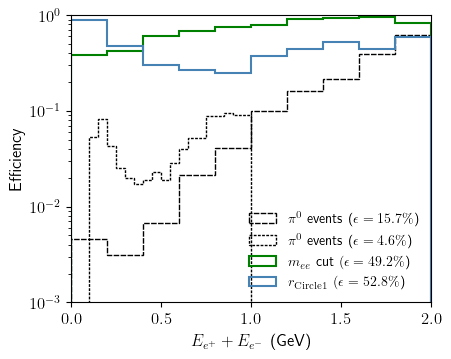

In [33]:
from importlib.resources import open_text

fig, ax = pt.std_fig()
VAR = etot_r # df['P_decay_ell_plus','0'] + df['P_decay_ell_minus','0']
ALPHA = 0.3
LW = 1.5

bins = np.linspace(0.0, 2.0, 11, endpoint=True)
binc = (bins[:-1]+bins[1:])/2
patterson_eff = np.genfromtxt(open_text('fastbnb.include.Patterson_tools', 'pi0_nueCCQE_eff.dat'))
ax.hist(binc, bins= bins, weights=patterson_eff, histtype='step', color='black', ls=(1,(4,1)), label=fr'$\pi^0$ events ($\epsilon = {np.mean(patterson_eff)*100:.1f}\%$)')

kelly_bins = np.linspace(0.0, 1.0, 21, endpoint=True)
kelly_circ1_eff = np.genfromtxt(open_text('fastbnb.include.pi0_tools', 'pi0_efficiency_circ1.dat'))
ax.hist(kelly_circ1_eff[:,0], bins= kelly_bins, weights=kelly_circ1_eff[:,1], histtype='step', color='black', ls=(1,(2,1)), label=fr'$\pi^0$ events ($\epsilon = {np.mean(kelly_circ1_eff[:,1])*100:.1f}\%$)')



histOriginal, _ = np.histogram(VAR, bins = bins, weights = HistWeight)
histCutMee, _ = np.histogram(VAR, bins = bins, weights = HistWeight_CutMee)
histCutCirc0, _ = np.histogram(VAR, bins = bins, weights = HistWeight_CutCirc0)
histCutDiag, _ = np.histogram(VAR, bins = bins, weights=HistWeight_CutDiag)
histCutCirc1, _ = np.histogram(VAR, bins = bins, weights = HistWeight_CutCirc1)

_ = ax.hist(binc, bins = bins, weights=histCutMee/histOriginal, histtype='step', facecolor = 'None', edgecolor='green', lw=LW, label=r'$m_{ee}$ cut'+fr' $(\epsilon = {eff_CutMee*100:.1f}\%$)')
# _ = ax.hist(binc, bins = bins, weights=histCutCirc0/histOriginal, histtype='step', facecolor = 'None', edgecolor='navajowhite', lw=LW, label=r'$r_{\rm Circle 0}$'+fr' $(\epsilon = {eff_CutCirc0*100:.1f}\%$)')
# _ = ax.hist(binc, bins = bins, weights=histCutDiag/histOriginal, histtype='step', facecolor = 'None', edgecolor='violet', lw=LW, label=r'$r_{\rm Diagonal}$'+fr' $(\epsilon = {eff_CutDiag*100:.1f}\%$)')
_ = ax.hist(binc, bins = bins, weights=histCutCirc1/histOriginal, histtype='step', facecolor = 'None', edgecolor='steelblue', lw=LW, label=r'$r_{\rm Circle 1}$'+fr' $(\epsilon = {eff_CutCirc1*100:.1f}\%$)')

ax.legend(loc='lower right')
ax.set_xlabel(r'$E_{e^+} + E_{e^-}$ (GeV)')
ax.set_ylabel(r'Efficiency')
ax.set_xlim(0,2)
ax.set_ylim(0.001,1)
ax.set_yscale('log')
fig.savefig('plots/Comparison_of_eff_for_pi0.pdf', bbox_inches='tight')

In [29]:
histOriginal, _, _ = ax.hist(VAR, bins=bins, histtype='step', edgecolor='black', weights=HistWeight, zorder=2, density=False, label=r'Total')
histCutMee, _, _ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='grey', lw=LW, weights = HistWeight_CutMee, zorder=3)
histCutCirc0, _, _ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='navajowhite', lw=LW, weights = HistWeight_CutCirc0, zorder=3)
histCutDiag, _, _ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='violet', lw=LW, weights=HistWeight_CutDiag, zorder=3)
histCutCirc1, _, _ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='steelblue', lw=LW, weights = HistWeight_CutCirc1, zorder=3)

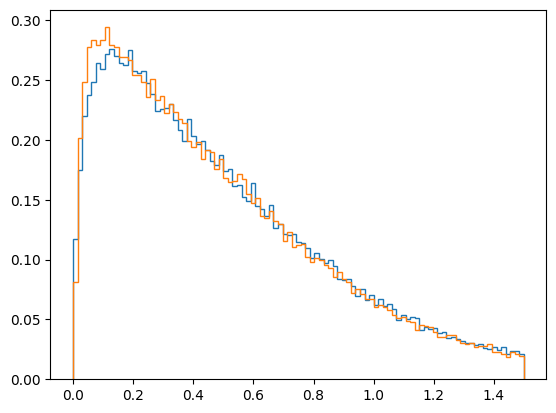

In [21]:
nentries = len(costhetaep)
# newcos = ta.cuts.gauss_smear_angle(costhetaep, 10*np.pi/180*np.ones(nentries))
bins = np.linspace(0, 1.5, 100)

pep = fastmc.smear_samples(df['P_decay_ell_minus'], dn.const.m_e, exp='miniboone')
pep_true = df['P_decay_ell_plus'].to_numpy()

# Get rid of invisible events (smearing brough E <= 0)
w[pep[:,0] < 1e-3] *= 0
w[pep[:,0] < 1e-3] *= 0

_ = plt.hist(pep[:,0], bins = bins, weights=w, histtype = 'step')
_ = plt.hist(pep_true[:,0], bins = bins, weights=w, histtype = 'step')

In [16]:
_ = plt.hist2d(Delta_costheta, emax/etot, bins=[np.linspace(-1,1,20),np.linspace(0.5,1,20)], cmap='Blues', weights=HistWeight)

NameError: name 'Delta_costheta' is not defined

### r cut variable

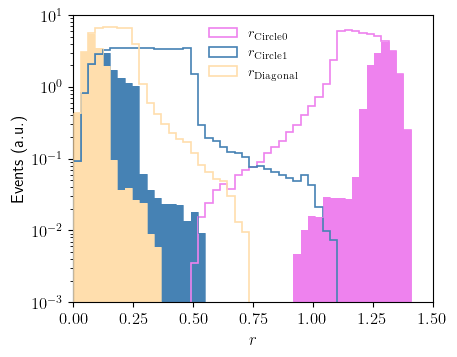

In [25]:
fig, ax = pt.std_fig()

bins = np.linspace(0, 1.5, NBINS)

_ = ax.hist(r_circ0, bins = bins, histtype = 'stepfilled', facecolor = 'violet', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutDiag)
_ = ax.hist(r_circ0, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='violet', lw=0.5, weights=HistWeight_CutDiag, zorder=3)

_ = ax.hist(r_circ1, bins = bins, histtype = 'stepfilled', facecolor = 'steelblue', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc1)
_ = ax.hist(r_circ1, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='steelblue', lw=0.5, weights = HistWeight_CutCirc1, zorder=3)

_ = ax.hist(r_diag, bins = bins, histtype = 'stepfilled', facecolor = 'navajowhite', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc0)
_ = ax.hist(r_diag, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='navajowhite', lw=0.5, weights = HistWeight_CutCirc0, zorder=3)

_ = ax.hist(r_circ0, bins=bins, histtype='step', lw=1.2, edgecolor='violet', weights=HistWeight, zorder=2,density=False, label=r'$r_{\rm Circle 0}$')
_ = ax.hist(r_circ1, bins=bins, histtype='step', lw=1.2, edgecolor='steelblue', weights=HistWeight, zorder=2,density=False, label=r'$r_{\rm Circle 1}$')
_ = ax.hist(r_diag, bins=bins, histtype='step', lw=1.2, edgecolor='navajowhite', weights=HistWeight, zorder=2,density=False, label=r'$r_{\rm Diagonal}$')

ax.legend(loc='upper center')
ax.set_xlim(0,1.5)
ax.set_ylim(1e-3,10)
ax.set_yscale('log')
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'Events (a.u.)')
fig.savefig('plots/r_distributions.pdf', bbox_inches='tight')

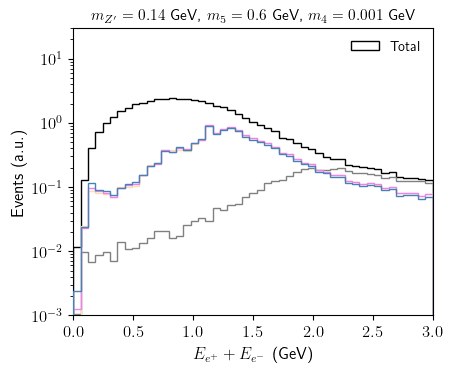

In [26]:
fig, ax = pt.std_fig()

VAR = etot
bins = np.linspace(0, 3, NBINS)
ALPHA = 0.3
LW = 1.

histOriginal, _, _ = ax.hist(VAR, bins=bins, histtype='step', edgecolor='black', weights=HistWeight, zorder=2, density=False, label=r'Total')
histCutMee, _, _ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='grey', lw=LW, weights = HistWeight_CutMee, zorder=3)
histCutCirc0, _, _ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='navajowhite', lw=LW, weights = HistWeight_CutCirc0, zorder=3)
histCutDiag, _, _ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='violet', lw=LW, weights=HistWeight_CutDiag, zorder=3)
histCutCirc1, _, _ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='steelblue', lw=LW, weights = HistWeight_CutCirc1, zorder=3)
ax.set_title(rf'$m_{{Z^\prime}} = {df.attrs["model"].mzprime}$ GeV, $m_5 = {df.attrs["model"].m5}$ GeV, $m_4 = {df.attrs["model"].m4}$ GeV', fontsize=11)

ax.legend(loc='upper right')
ax.set_xlim(0,np.max(bins))
ax.set_ylim(1e-3,30)
ax.set_yscale('log')
ax.set_xlabel(r'$E_{e^+} + E_{e^-}$ (GeV)')
ax.set_ylabel(r'Events (a.u.)')
fig.savefig(f'plots/cut_comparisons/Evis_with_r_cut_{df.attrs["model"].mzprime}_{df.attrs["model"].m5}_{df.attrs["model"].m4}.pdf', bbox_inches='tight')

In [ ]:
from importlib.resources import open_text

fig, ax = pt.std_fig()
VAR = 
ALPHA = 0.3
LW = 1.5

bins = np.linspace(0.0, 2.0, 11, endpoint=True)
binc = (bins[:-1]+bins[1:])/2
patterson_eff = np.genfromtxt(open_text('fastbnb.include.Patterson_tools', 'pi0_nueCCQE_eff.dat'))
ax.hist(binc, bins= bins, weights=eff, histtype='step', color='black', ls=(1,(4,1)), label=fr'$\pi^0$ events ($\epsilon = {np.mean(eff)*100:.1f}\%$)')

kelly_bins = np.linspace(0.0, 1.0, 21, endpoint=True)
kelly_circ1_eff = np.genfromtxt(open_text('fastbnb.include.pi0_tools', 'pi0_efficiency_circ1.dat'))
ax.hist(kelly_circ1_eff[:,0], bins= kelly_bins, weights=kelly_circ1_eff[:,1], histtype='step', color='black', ls=(1,(2,1)), label=fr'$\pi^0$ events ($\epsilon = {np.mean(kelly_circ1_eff[:,1])*100:.1f}\%$)')



histOriginal, _ = np.histogram(VAR, bins = bins, weights = HistWeight)
histCutMee, _ = np.histogram(VAR, bins = bins, weights = HistWeight_CutMee)
histCutCirc0, _ = np.histogram(VAR, bins = bins, weights = HistWeight_CutCirc0)
histCutDiag, _ = np.histogram(VAR, bins = bins, weights=HistWeight_CutDiag)
histCutCirc1, _ = np.histogram(VAR, bins = bins, weights = HistWeight_CutCirc1)

_ = ax.hist(binc, bins = bins, weights=histCutMee/histOriginal, histtype='step', facecolor = 'None', edgecolor='green', lw=LW, label=r'$m_{ee}$ cut'+fr' $(\epsilon = {eff_CutMee*100:.1f}\%$)')
# _ = ax.hist(binc, bins = bins, weights=histCutCirc0/histOriginal, histtype='step', facecolor = 'None', edgecolor='navajowhite', lw=LW, label=r'$r_{\rm Circle 0}$'+fr' $(\epsilon = {eff_CutCirc0*100:.1f}\%$)')
# _ = ax.hist(binc, bins = bins, weights=histCutDiag/histOriginal, histtype='step', facecolor = 'None', edgecolor='violet', lw=LW, label=r'$r_{\rm Diagonal}$'+fr' $(\epsilon = {eff_CutDiag*100:.1f}\%$)')
_ = ax.hist(binc, bins = bins, weights=histCutCirc1/histOriginal, histtype='step', facecolor = 'None', edgecolor='steelblue', lw=LW, label=r'$r_{\rm Circle 1}$'+fr' $(\epsilon = {eff_CutCirc1*100:.1f}\%$)')

ax.legend(loc='lower right')
ax.set_xlabel(r'$E_{e^+} + E_{e^-}$ (GeV)')
ax.set_ylabel(r'Efficiency')
ax.set_xlim(0,2)
ax.set_ylim(0.001,1)
ax.set_yscale('log')
fig.savefig('plots/Comparison_of_eff_for_pi0.pdf', bbox_inches='tight')

### Invariant mass

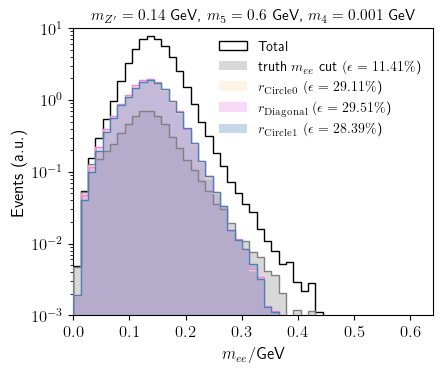

In [ ]:
fig, ax = pt.std_fig()

VAR = mee
bins = np.linspace(0, np.max(VAR), NBINS)
ALPHA = 0.3
LW = 1.

_ = ax.hist(VAR, bins=bins, histtype='step', edgecolor='black', weights=HistWeight, zorder=2, density=False, label=r'Total')

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'grey', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutMee, label=r'truth $m_{ee}$ cut'+fr' $(\epsilon = {eff_CutMee*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='grey', lw=LW, weights = HistWeight_CutMee, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'navajowhite', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc0, label=r'$r_{\rm Circle 0}$'+fr' $(\epsilon = {eff_CutCirc0*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='navajowhite', lw=LW, weights = HistWeight_CutCirc0, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'violet', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutDiag, label=r'$r_{\rm Diagonal}$'+fr' $(\epsilon = {eff_CutDiag*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='violet', lw=LW, weights=HistWeight_CutDiag, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'steelblue', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc1, label=r'$r_{\rm Circle 1}$'+fr' $(\epsilon = {eff_CutCirc1*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='steelblue', lw=LW, weights = HistWeight_CutCirc1, zorder=3)

ax.set_title(rf'$m_{{Z^\prime}} = {df.attrs["model"].mzprime}$ GeV, $m_5 = {df.attrs["model"].m5}$ GeV, $m_4 = {df.attrs["model"].m4}$ GeV', fontsize=11)
ax.legend(loc='upper right')

ax.set_xlim(0,np.max(bins))
ax.set_ylim(1e-3,10)
ax.set_yscale('log')
ax.set_xlabel(r'$m_{ee}/$GeV')
ax.set_ylabel(r'Events (a.u.)')
fig.savefig(f'plots/cut_comparisons/invmass_r_cut_{df.attrs["model"].mzprime}_{df.attrs["model"].m5}_{df.attrs["model"].m4}.pdf', bbox_inches='tight')

### Total energy

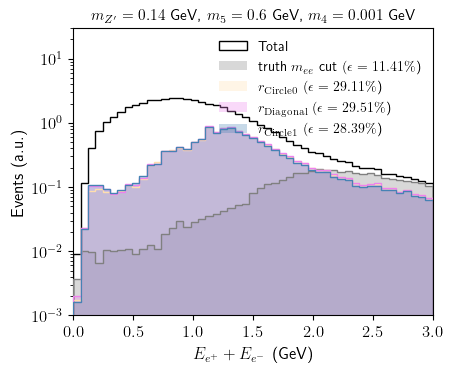

In [ ]:
fig, ax = pt.std_fig()

VAR = etot
bins = np.linspace(0, 3, NBINS)
ALPHA = 0.3
LW = 1.

_ = ax.hist(VAR, bins=bins, histtype='step', edgecolor='black', weights=HistWeight, zorder=2, density=False, label=r'Total')

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'grey', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutMee, label=r'truth $m_{ee}$ cut'+fr' $(\epsilon = {eff_CutMee*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='grey', lw=LW, weights = HistWeight_CutMee, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'navajowhite', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc0, label=r'$r_{\rm Circle 0}$'+fr' $(\epsilon = {eff_CutCirc0*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='navajowhite', lw=LW, weights = HistWeight_CutCirc0, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'violet', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutDiag, label=r'$r_{\rm Diagonal}$'+fr' $(\epsilon = {eff_CutDiag*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='violet', lw=LW, weights=HistWeight_CutDiag, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'steelblue', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc1, label=r'$r_{\rm Circle 1}$'+fr' $(\epsilon = {eff_CutCirc1*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='steelblue', lw=LW, weights = HistWeight_CutCirc1, zorder=3)

ax.set_title(rf'$m_{{Z^\prime}} = {df.attrs["model"].mzprime}$ GeV, $m_5 = {df.attrs["model"].m5}$ GeV, $m_4 = {df.attrs["model"].m4}$ GeV', fontsize=11)

ax.legend(loc='upper right')
ax.set_xlim(0,np.max(bins))
ax.set_ylim(1e-3,30)
ax.set_yscale('log')
ax.set_xlabel(r'$E_{e^+} + E_{e^-}$ (GeV)')
ax.set_ylabel(r'Events (a.u.)')
fig.savefig(f'plots/cut_comparisons/Evis_with_r_cut_{df.attrs["model"].mzprime}_{df.attrs["model"].m5}_{df.attrs["model"].m4}.pdf', bbox_inches='tight')

### Emax/Etot

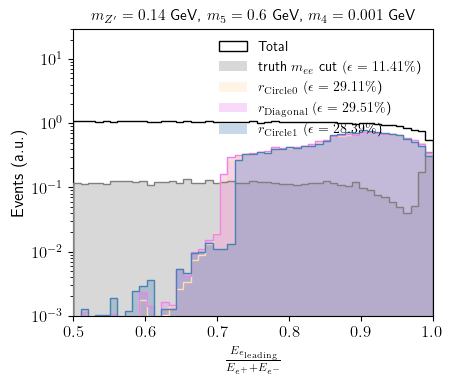

In [ ]:
fig, ax = pt.std_fig()
VAR = emax/etot
bins = np.linspace(0.5, np.max(VAR), NBINS)
ALPHA = 0.3
LW = 1.

_ = ax.hist(VAR, bins=bins, histtype='step', edgecolor='black', weights=HistWeight, zorder=2, density=False, label=r'Total')

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'grey', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutMee, label=r'truth $m_{ee}$ cut'+fr' $(\epsilon = {eff_CutMee*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='grey', lw=LW, weights = HistWeight_CutMee, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'navajowhite', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc0, label=r'$r_{\rm Circle 0}$'+fr' $(\epsilon = {eff_CutCirc0*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='navajowhite', lw=LW, weights = HistWeight_CutCirc0, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'violet', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutDiag, label=r'$r_{\rm Diagonal}$'+fr' $(\epsilon = {eff_CutDiag*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='violet', lw=LW, weights=HistWeight_CutDiag, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'steelblue', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc1, label=r'$r_{\rm Circle 1}$'+fr' $(\epsilon = {eff_CutCirc1*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='steelblue', lw=LW, weights = HistWeight_CutCirc1, zorder=3)

ax.set_title(rf'$m_{{Z^\prime}} = {df.attrs["model"].mzprime}$ GeV, $m_5 = {df.attrs["model"].m5}$ GeV, $m_4 = {df.attrs["model"].m4}$ GeV', fontsize=11)

ax.legend(loc='upper right', ncol=1, fontsize=10) 
ax.set_xlim(0.5,1)
ax.set_ylim(1e-3,30)
ax.set_yscale('log')
ax.set_xlabel(r'$\frac{E_{e_{\rm leading}}}{E_{e^+} + E_{e^-}}$')
ax.set_ylabel(r'Events (a.u.)')
fig.savefig(f'plots/cut_comparisons/EmaxoverEtot_with_r_cut_{df.attrs["model"].mzprime}_{df.attrs["model"].m5}_{df.attrs["model"].m4}.pdf', bbox_inches='tight')

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_12195/1149267336.py:2: RuntimeWarning: invalid value encountered in divide
  VAR = (np.sqrt(pep[:,0]**2 - dn.const.m_e**2) - np.sqrt(pem[:,0]**2 - dn.const.m_e**2))/(np.sqrt(pep[:,0]**2 - dn.const.m_e**2) + np.sqrt(pem[:,0]**2 - dn.const.m_e**2))


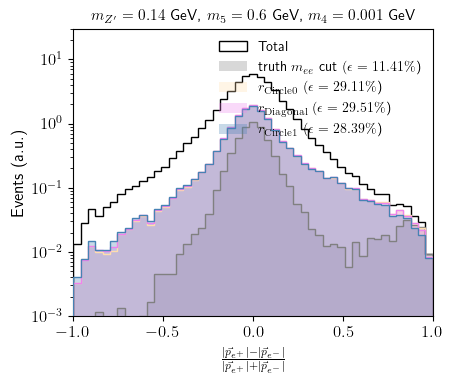

In [ ]:
fig, ax = pt.std_fig()
VAR = (np.sqrt(pep[:,0]**2 - dn.const.m_e**2) - np.sqrt(pem[:,0]**2 - dn.const.m_e**2))/(np.sqrt(pep[:,0]**2 - dn.const.m_e**2) + np.sqrt(pem[:,0]**2 - dn.const.m_e**2))
bins = np.linspace(-1, 1, NBINS)
ALPHA = 0.3
LW = 1.

_ = ax.hist(VAR, bins=bins, histtype='step', edgecolor='black', weights=HistWeight, zorder=2, density=False, label=r'Total')

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'grey', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutMee, label=r'truth $m_{ee}$ cut'+fr' $(\epsilon = {eff_CutMee*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='grey', lw=LW, weights = HistWeight_CutMee, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'navajowhite', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc0, label=r'$r_{\rm Circle 0}$'+fr' $(\epsilon = {eff_CutCirc0*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='navajowhite', lw=LW, weights = HistWeight_CutCirc0, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'violet', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutDiag, label=r'$r_{\rm Diagonal}$'+fr' $(\epsilon = {eff_CutDiag*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='violet', lw=LW, weights=HistWeight_CutDiag, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'steelblue', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc1, label=r'$r_{\rm Circle 1}$'+fr' $(\epsilon = {eff_CutCirc1*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='steelblue', lw=LW, weights = HistWeight_CutCirc1, zorder=3)

ax.set_title(rf'$m_{{Z^\prime}} = {df.attrs["model"].mzprime}$ GeV, $m_5 = {df.attrs["model"].m5}$ GeV, $m_4 = {df.attrs["model"].m4}$ GeV', fontsize=11)

ax.legend(loc='upper right', ncol=1, fontsize=10) 

ax.set_xlim(-1,1)
ax.set_ylim(1e-3,30)
ax.set_yscale('log')
ax.set_xlabel(r'$\frac{|\vec{p}_{e^+}| - |\vec{p}_{e^-}|}{|\vec{p}_{e^+}| + |\vec{p}_{e^-}|}$')
ax.set_ylabel(r'Events (a.u.)')

fig.savefig(f'plots/cut_comparisons/EmaxoverEtot_with_r_cut_{df.attrs["model"].mzprime}_{df.attrs["model"].m5}_{df.attrs["model"].m4}.pdf', bbox_inches='tight')

### Opening angle

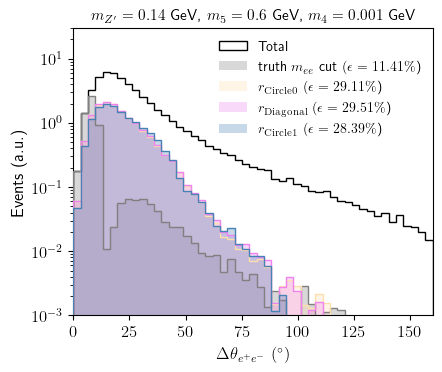

In [ ]:
fig, ax = pt.std_fig()

VAR = np.arccos(Delta_costheta)*180/np.pi
bins = np.linspace(0, 160, NBINS)
ALPHA = 0.3
LW = 1.

_ = ax.hist(VAR, bins=bins, histtype='step', edgecolor='black', weights=HistWeight, zorder=2, density=False, label=r'Total')

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'grey', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutMee, label=r'truth $m_{ee}$ cut'+fr' $(\epsilon = {eff_CutMee*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='grey', lw=LW, weights = HistWeight_CutMee, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'navajowhite', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc0, label=r'$r_{\rm Circle 0}$'+fr' $(\epsilon = {eff_CutCirc0*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='navajowhite', lw=LW, weights = HistWeight_CutCirc0, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'violet', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutDiag, label=r'$r_{\rm Diagonal}$'+fr' $(\epsilon = {eff_CutDiag*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='violet', lw=LW, weights=HistWeight_CutDiag, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'steelblue', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc1, label=r'$r_{\rm Circle 1}$'+fr' $(\epsilon = {eff_CutCirc1*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='steelblue', lw=LW, weights = HistWeight_CutCirc1, zorder=3)

ax.set_title(rf'$m_{{Z^\prime}} = {df.attrs["model"].mzprime}$ GeV, $m_5 = {df.attrs["model"].m5}$ GeV, $m_4 = {df.attrs["model"].m4}$ GeV', fontsize=11)

ax.legend(loc='upper right')
ax.set_xlim(0,np.max(bins))
ax.set_ylim(1e-3,30)
ax.set_yscale('log')

ax.set_xlabel(r'$\Delta \theta_{e^+e^-}$ $({}^\circ)$')
ax.set_ylabel(r'Events (a.u.)')
fig.savefig(f'plots/cut_comparisons/DeltaTheta_with_r_cut_{df.attrs["model"].mzprime}_{df.attrs["model"].m5}_{df.attrs["model"].m4}.pdf', bbox_inches='tight')

### Angle of the leading electron 

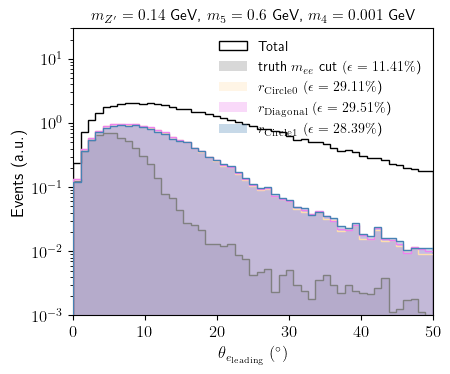

In [ ]:
fig, ax = pt.std_fig()

VAR = np.arccos(costhetaemax)*180/np.pi
bins = np.linspace(0, 50, NBINS)

ALPHA = 0.3
LW = 1.

_ = ax.hist(VAR, bins=bins, histtype='step', edgecolor='black', weights=HistWeight, zorder=2, density=False, label=r'Total')

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'grey', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutMee, label=r'truth $m_{ee}$ cut'+fr' $(\epsilon = {eff_CutMee*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='grey', lw=LW, weights = HistWeight_CutMee, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'navajowhite', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc0, label=r'$r_{\rm Circle 0}$'+fr' $(\epsilon = {eff_CutCirc0*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='navajowhite', lw=LW, weights = HistWeight_CutCirc0, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'violet', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutDiag, label=r'$r_{\rm Diagonal}$'+fr' $(\epsilon = {eff_CutDiag*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='violet', lw=LW, weights=HistWeight_CutDiag, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'steelblue', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = HistWeight_CutCirc1, label=r'$r_{\rm Circle 1}$'+fr' $(\epsilon = {eff_CutCirc1*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='steelblue', lw=LW, weights = HistWeight_CutCirc1, zorder=3)

ax.set_title(rf'$m_{{Z^\prime}} = {df.attrs["model"].mzprime}$ GeV, $m_5 = {df.attrs["model"].m5}$ GeV, $m_4 = {df.attrs["model"].m4}$ GeV', fontsize=11)

ax.legend(loc='upper right')
ax.set_ylim(1e-3,30)
ax.set_yscale('log')
ax.set_xlim(0,np.max(bins))
ax.set_xlabel(r'$\theta_{e_{\rm leading}}$ $({}^\circ)$')
ax.set_ylabel(r'Events (a.u.)')
fig.savefig(f'plots/cut_comparisons/ThetaEmax_with_r_cut_{df.attrs["model"].mzprime}_{df.attrs["model"].m5}_{df.attrs["model"].m4}.pdf', bbox_inches='tight')

## Exploring a π0-like sample

In [ ]:
pi0_ovl = (Delta_costheta > np.cos(13*np.pi/180))
pi0_asy = (pep[:,0] > 0.03) & (pem[:,0] > 0.03)
pi0_OldCut = pi0_ovl | pi0_asy

pi0_HistWeight_CutCirc1 = HistWeight * (r_circ1 > f_cut_circle1(etot))
pi0_HistWeight_CutCirc0 = HistWeight * (r_circ0 < f_cut_circle0(etot))
pi0_HistWeight_CutDiag = HistWeight * (r_diag > f_cut_diag(etot))
pi0_HistWeight_CutMee = HistWeight * pi0_OldCut


pi0_eff_CutCirc1 = np.sum(pi0_HistWeight_CutCirc1) / np.sum(HistWeight)
pi0_eff_CutCirc0 = np.sum(pi0_HistWeight_CutCirc0) / np.sum(HistWeight)
pi0_eff_CutDiag = np.sum(pi0_HistWeight_CutDiag) / np.sum(HistWeight)
pi0_eff_CutMee = np.sum(pi0_HistWeight_CutMee) / np.sum(HistWeight)

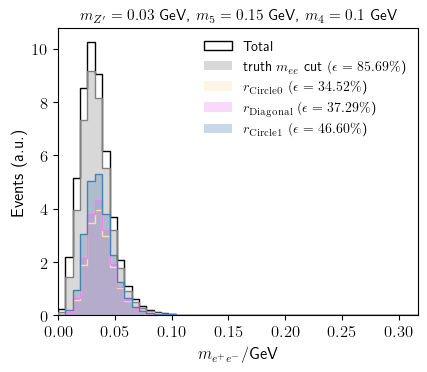

In [ ]:
fig, ax = pt.std_fig()

VAR = mee
bins = np.linspace(0, np.max(mee), NBINS)
ALPHA = 0.3
LW = 1.

_ = ax.hist(VAR, bins=bins, histtype='step', edgecolor='black', weights=HistWeight, zorder=2, density=False, label=r'Total')

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'grey', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = pi0_HistWeight_CutMee, label=r'truth $m_{ee}$ cut'+fr' $(\epsilon = {pi0_eff_CutMee*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='grey', lw=LW, weights = pi0_HistWeight_CutMee, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'navajowhite', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = pi0_HistWeight_CutCirc0, label=r'$r_{\rm Circle 0}$'+fr' $(\epsilon = {pi0_eff_CutCirc0*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='navajowhite', lw=LW, weights = pi0_HistWeight_CutCirc0, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'violet', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = pi0_HistWeight_CutDiag, label=r'$r_{\rm Diagonal}$'+fr' $(\epsilon = {pi0_eff_CutDiag*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='violet', lw=LW, weights=pi0_HistWeight_CutDiag, zorder=3)

_ = ax.hist(VAR, bins = bins, histtype = 'stepfilled', facecolor = 'steelblue', edgecolor = 'black', lw = 0.0, alpha = ALPHA, zorder = 1, weights = pi0_HistWeight_CutCirc1, label=r'$r_{\rm Circle 1}$'+fr' $(\epsilon = {pi0_eff_CutCirc1*100:.2f}\%$)')
_ = ax.hist(VAR, bins = bins, histtype = 'step', facecolor = 'None', edgecolor='steelblue', lw=LW, weights = pi0_HistWeight_CutCirc1, zorder=3)

ax.set_title(rf'$m_{{Z^\prime}} = {df.attrs["model"].mzprime}$ GeV, $m_5 = {df.attrs["model"].m5}$ GeV, $m_4 = {df.attrs["model"].m4}$ GeV', fontsize=11)

ax.legend(loc='upper right')
ax.set_xlim(0,np.max(bins))
# ax.set_ylim(1e-3,30)
# ax.set_yscale('log')

ax.set_xlabel(r'$m_{e^+e^-}$/GeV')
ax.set_ylabel(r'Events (a.u.)')
fig.savefig(f'plots/cut_comparisons/mee_pi0like_{df.attrs["model"].mzprime}_{df.attrs["model"].m5}_{df.attrs["model"].m4}.pdf', bbox_inches='tight')

## Comparing the m_gg shape of NCpi0 and BSM

In [ ]:
from importlib.resources import open_text

_, pi0data = np.genfromtxt(open_text("ToyAnalysis.include.pi0_tools","MB_numode_pi0_data.dat"), unpack = True)
_, pi0totalMC = np.genfromtxt(open_text("ToyAnalysis.include.pi0_tools","MB_numode_pi0_total_MC.dat"), unpack = True)
_, pi0NCpi0MC = np.genfromtxt(open_text("ToyAnalysis.include.pi0_tools","MB_numode_pi0_NCpi0_MC.dat"), unpack = True)
pi0NCpi0MC = np.append(pi0NCpi0MC, np.zeros(17))

bin_edges = np.linspace(0,0.4, len(pi0data)+1, endpoint=True)
bin_widths = -(bin_edges[:-1] - bin_edges[1:])
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

normalization = 6.46*bin_widths*1e3

pi0data *= normalization
pi0totalMC *= normalization
pi0NCpi0MC *= normalization


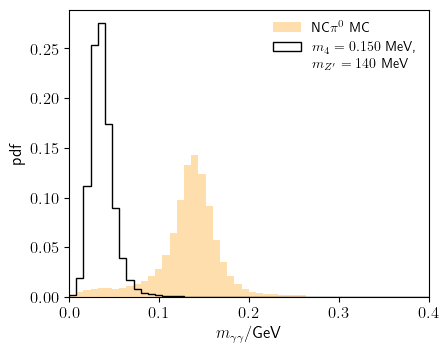

In [ ]:
fig, ax = pt.std_fig()

kwargs = {'fmt': 'o', 'ms': 3, 'color': 'black', 'linewidth': 0.5, 'markeredgewidth': 0.5, 'markeredgecolor': 'black', 'markerfacecolor': 'white'}

_ = ax.hist(bin_centers, bins = bin_edges, density=False, weights = pi0NCpi0MC/np.sum(pi0NCpi0MC), facecolor='navajowhite', label=r'NC$\pi^0$ MC')

w_bsm = pi0_HistWeight_CutCirc1/np.sum(pi0_HistWeight_CutCirc1)*2400
_ = ax.hist(mee, bins=bin_edges, density=False, weights=w_bsm/np.sum(w_bsm), histtype='step', edgecolor='black', zorder=2, label=r'\noindent $m_4 = 0.150$~MeV,\\$m_{Z^\prime} = 140$~MeV')

ax.set_ylim(0,)
ax.set_xlim(0,0.4)

ax.set_xlabel(r'$m_{\gamma\gamma}$/GeV')
ax.set_ylabel(r'pdf')

ax.legend(loc='upper right')

fig.savefig('plots/numode_pi0.pdf', bbox_inches='tight')

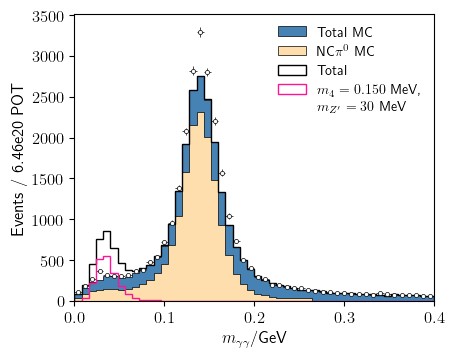

In [ ]:
fig, ax = pt.std_fig()

_, pi0data = np.genfromtxt(open_text("ToyAnalysis.include.pi0_tools","MB_numode_pi0_data.dat"), unpack = True)
_, pi0totalMC = np.genfromtxt(open_text("ToyAnalysis.include.pi0_tools","MB_numode_pi0_total_MC.dat"), unpack = True)
_, pi0NCpi0MC = np.genfromtxt(open_text("ToyAnalysis.include.pi0_tools","MB_numode_pi0_NCpi0_MC.dat"), unpack = True)
pi0NCpi0MC = np.append(pi0NCpi0MC, np.zeros(17))

bin_edges = np.linspace(0,0.4, len(pi0data)+1, endpoint=True)
bin_widths = -(bin_edges[:-1] - bin_edges[1:])
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

normalization = 6.46*bin_widths*1e3

pi0data *= normalization
pi0totalMC *= normalization
pi0NCpi0MC *= normalization

kwargs = {'fmt': 'o', 'ms': 3, 'color': 'black', 'linewidth': 0.5, 'markeredgewidth': 0.5, 'markeredgecolor': 'black', 'markerfacecolor': 'white'}
ax.errorbar(bin_centers, pi0data, yerr = np.sqrt(pi0data), xerr = bin_widths/2, 
            **kwargs )
ax.hist(bin_centers, bins = bin_edges, weights = pi0totalMC, facecolor='steelblue', lw=0.5, edgecolor='black', histtype='stepfilled', label=r'Total  MC')
ax.hist(bin_centers, bins = bin_edges, weights = pi0NCpi0MC, facecolor='navajowhite', lw=0.5, edgecolor='black', histtype='stepfilled', label=r'NC$\pi^0$ MC')

w_bsm = pi0_HistWeight_CutCirc1/np.sum(pi0_HistWeight_CutCirc1)*2000
x=np.append(mee, bin_centers)
y=np.append(w_bsm, pi0totalMC)
_ = ax.hist(x, bins=bin_edges,  weights=y, histtype='step', edgecolor='black', zorder=2, density=False, label=r'Total')

_ = ax.hist(mee, bins=bin_edges, zorder=2, lw=1., density=False, weights=w_bsm, histtype='step', edgecolor='deeppink', label=r'\noindent $m_4 = 0.150$~MeV,\\$m_{Z^\prime} = 30$~MeV')

ax.set_ylim(0,)
ax.set_xlim(0,0.4)

ax.set_xlabel(r'$m_{\gamma\gamma}$/GeV')
ax.set_ylabel(r'Events / 6.46e20 POT')

ax.legend(loc='upper right')

fig.savefig('plots/numode_pi0.pdf', bbox_inches='tight')

## MiniBooNE data sets

/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/ToyBNB/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = ( const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e)*costheta)
/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/ToyBNB/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = ( const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e)*costheta)
/usr/local/anaconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


4.1586234877881116e-22


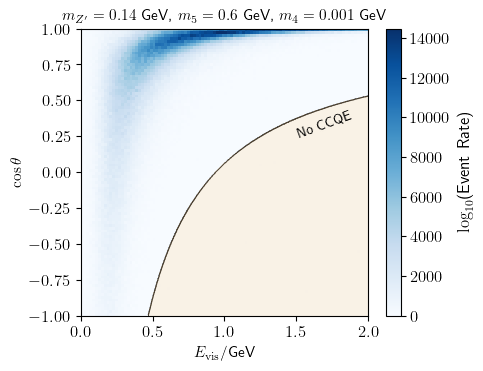

In [ ]:
fig, ax = pt.std_fig()

dfp = ta.analysis.reco_nueCCQElike_Enu(df_6)

x = np.linspace(0., 2, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
z = ta.fastmc.reco_EnuCCQE(X, Y)
# plt.pcolor(X,Y, np.log10(z), cmap='Blues')
# plt.pcolor(X,Y, np.log10(-z), cmap='Reds')
threshold= dn.const.m_e
ax.contour(X,Y, z, levels=[threshold], colors=['black'], zorder=2, linewidths=[0.75])
ax.contourf(X,Y, z, levels=[-10000,threshold], colors=['navajowhite'], alpha=0.3, zorder=2)
ax.annotate(r'No CCQE', xy=(1.5,0.24), zorder=3, rotation=20)
h=ax.hist2d(dfp['reco_Evis'], dfp['reco_costheta_beam'], range=[[0, 2], [-1, 1]], bins=100, weights = -np.log(dfp['w_event_rate']), cmap='Blues')
fig.colorbar(h[3], label='$\log_{10}$(Event Rate)')

ax.set_title(rf'$m_{{Z^\prime}} = {df.attrs["model"].mzprime}$ GeV, $m_5 = {df.attrs["model"].m5}$ GeV, $m_4 = {df.attrs["model"].m4}$ GeV', fontsize=11)


ax.set_xlabel(r'$E_{\mathrm{vis}}$/GeV', fontsize=11)
ax.set_ylabel(r'$\cos{\theta}$', fontsize=11)
ax.set_ylim(-1,1)

enur = ta.fastmc.reco_EnuCCQE(dfp['reco_Evis'], dfp['reco_costheta_beam'])
mask=(enur<0)
print((dfp['reco_w'][mask]).sum()/(dfp['reco_w']).sum())

fig.savefig('plots/reco_EnuCCQE.pdf', bbox_inches='tight')

/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/ToyBNB/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = ( const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e)*costheta)
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_12195/2142501904.py:7: RuntimeWarning: invalid value encountered in log10
  plt.pcolor(X,Y, np.log10(z), cmap='Blues')
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_12195/2142501904.py:8: RuntimeWarning: invalid value encountered in log10
  plt.pcolor(X,Y, np.log10(-z), cmap='Reds')


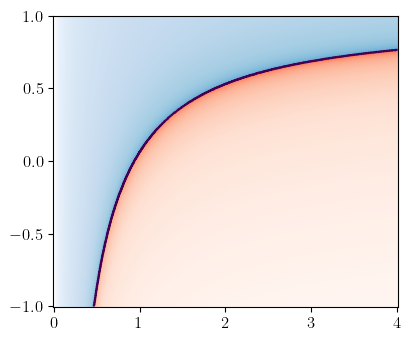

In [ ]:
from DarkNews import const 

x = np.linspace(0., 4, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
z = ta.fastmc.reco_EnuCCQE(X, Y)
plt.pcolor(X,Y, np.log10(z), cmap='Blues')
plt.pcolor(X,Y, np.log10(-z), cmap='Reds')
plt.contour(X,Y, z, levels=[0])
# plt.plot(x,0.5*(const.m_neutron**2 + const.m_e**2 - const.m_proton**2)/const.m_neutron)
# plt.matshow(np.log(-z))

/Users/matheushostert/Repos/MiniBooNE-DarkNews/src/ToyBNB/fastmc.py:30: RuntimeWarning: invalid value encountered in sqrt
  den = ( const.m_neutron - Evis + np.sqrt(Evis**2 - const.m_e)*costheta)


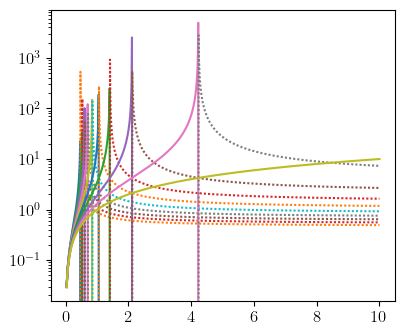

In [ ]:
x = np.linspace(0, 10, 1000)
for ct in np.linspace(-1,1,10):
    plt.plot(x,ta.fastmc.reco_EnuCCQE(x, ct))
    plt.plot(x,-ta.fastmc.reco_EnuCCQE(x, ct),dashes=(1,1))
# plt.ylim(-1,20)
plt.yscale('log')

(-4.0, 4.0)

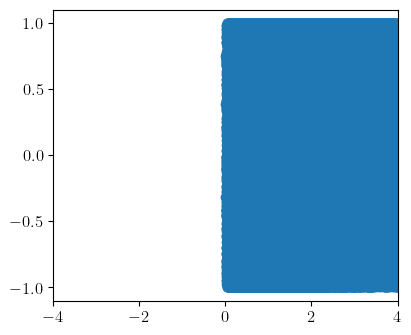

In [ ]:
plt.scatter(dfp['reco_Evis'], dfp['reco_costheta_beam'])
plt.xlim(-4,4)

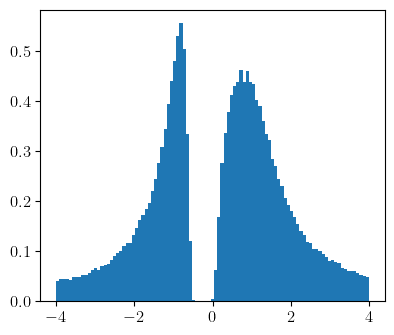

In [ ]:
_=plt.hist(dfp['reco_Enu'], bins = np.linspace(-4,4,100), weights=dfp['w_event_rate'])

In [ ]:
dfp   = an.compute_spectrum(df_decay, event_type='both')

ValueError: operands could not be broadcast together with shapes (49007,) (4,) 

MB events: 5.7e+02


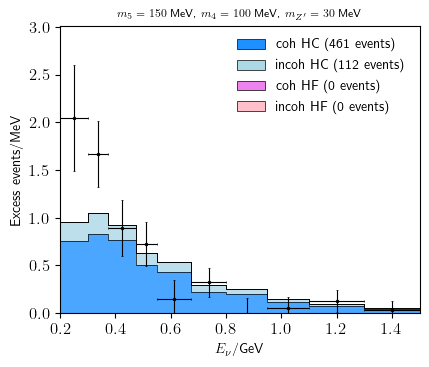

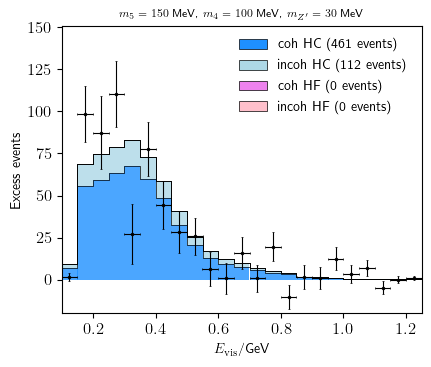

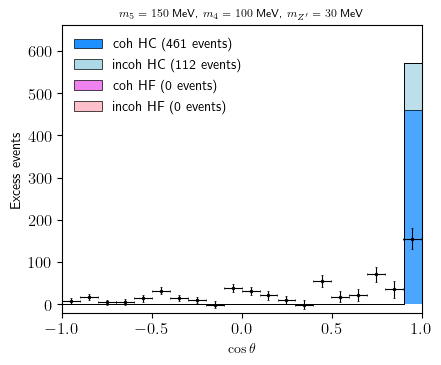

In [ ]:
ta.plot_tools.batch_plot_signalMB(dfp, PATH='plots/example_3', title=r'$m_5 = 150$ MeV, $m_4 = 100$ MeV, $m_{Z^\prime} = 30$ MeV')

### MiniBooNE efficiencies

These are the final EM shower efficiencies provided by the MiniBooNE collaboration, part of a data release: https://arxiv.org/abs/2110.15055

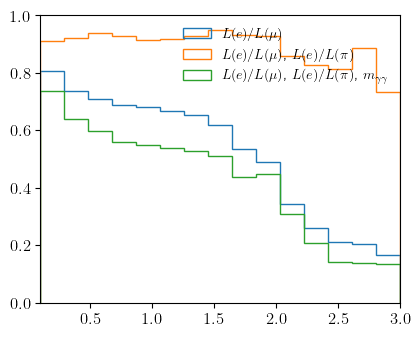

In [ ]:
fig, ax = pt.std_fig()


enu_1, eff_1 = np.genfromtxt(open_text('ToyBNB.include.Patterson_tools','nueCCQE_mu_eff.dat'), unpack = True)
enu_2, eff_2 = np.genfromtxt(open_text('ToyBNB.include.Patterson_tools','nueCCQE_mu_pi_eff.dat'), unpack = True)
enu_3, eff_3 = np.genfromtxt(open_text('ToyBNB.include.Patterson_tools','nueCCQE_final_eff.dat'), unpack = True)

bin_edges = np.linspace(0.1, 3.0, 16, endpoint=True)

ax.hist(enu_2*1e-3, bins = bin_edges, weights=eff_2, histtype='step', label = '$L(e)/L(\mu)$')
ax.hist(enu_1*1e-3, bins = bin_edges, weights=eff_1, histtype='step', label = '$L(e)/L(\mu)$, $L(e)/L(\pi)$')
ax.hist(enu_3*1e-3, bins = bin_edges, weights=eff_3, histtype='step', label = '$L(e)/L(\mu)$, $L(e)/L(\pi)$, $m_{\gamma\gamma}$')

ax.legend(loc = 'best')

ax.set_xlim(0.1, 3.0)
ax.set_ylim(0,1.0)

fig.savefig("plots/nueCCQE_mu_pi_eff.pdf", bbox_inches = 'tight')

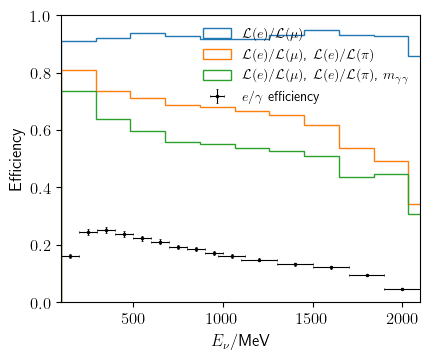

In [ ]:
fig,ax = pt.std_fig()



enu_1, eff_1 = np.genfromtxt(open_text('ToyBNB.include.Patterson_tools','nueCCQE_mu_eff.dat'), unpack = True)
enu_2, eff_2 = np.genfromtxt(open_text('ToyBNB.include.Patterson_tools','nueCCQE_mu_pi_eff.dat'), unpack = True)
enu_3, eff_3 = np.genfromtxt(open_text('ToyBNB.include.Patterson_tools','nueCCQE_final_eff.dat'), unpack = True)

bin_edges = np.linspace(100, 3.0e3, 16, endpoint=True)

ax.hist(enu_1, bins = bin_edges, weights=eff_1, histtype='step', label = r'$\mathcal{L}(e)/\mathcal{L}(\mu)$')
ax.hist(enu_2, bins = bin_edges, weights=eff_2, histtype='step', label = r'$\mathcal{L}(e)/\mathcal{L}(\mu)$, $\mathcal{L}(e)/\mathcal{L}(\pi)$')
ax.hist(enu_3, bins = bin_edges, weights=eff_3, histtype='step', label = r'$\mathcal{L}(e)/\mathcal{L}(\mu)$, $\mathcal{L}(e)/\mathcal{L}(\pi)$, $m_{\gamma\gamma}$')


enu_c, eff, err_eff = np.genfromtxt("ToyAnalysis/include/miniboone_eff/eg_effs.dat",unpack=True)
enu_w = (np.append(enu_c[1:],2200)-enu_c)
eff *= (610/500)**3
eff_func = interpolate.interp1d(enu_c, eff, fill_value=(eff[0],eff[-1]), bounds_error=False, kind='nearest')

kwargs={'facecolor': 'dodgerblue', 'edgecolor': 'None'}
ta.plot_tools.data_plot(ax, enu_c, enu_w, eff, err_eff/2, err_eff/2, label=r'$e/\gamma$ efficiency')
# ta.plot_tools.errorband_plot(ax, enu_c, enu_w, eff, err_eff/2, err_eff/2, label=r'$e/\gamma$ efficiency', **kwargs)
ax.legend(loc='upper right', ncol=1)

ax.set_ylim(0,1)
ax.set_xlim(100,2.1e3)
ax.set_xlabel(r"$E_\nu/$MeV")
ax.set_ylabel(r"Efficiency")

dn.plot_tools.std_savefig(fig, 'plots/miniboone_effs.pdf')

In [ ]:
(610/500)**3

1.815848

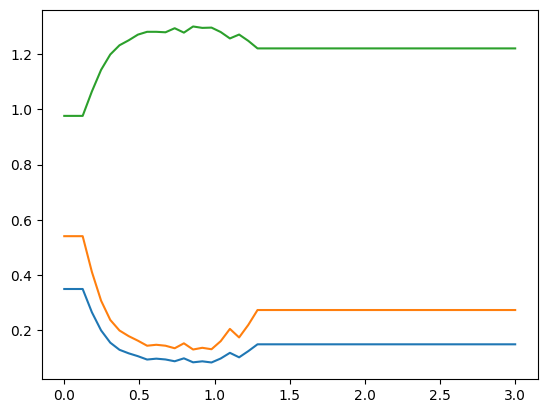

In [11]:
f_cut_diag    = fastmc.get_r_cut_func(cut='diag')
f_cut_circle1 = fastmc.get_r_cut_func(cut='circ1')
f_cut_circle0 = fastmc.get_r_cut_func(cut='circ0')

evis = np.linspace(0, 3)

plt.plot(evis, f_cut_diag(evis))
plt.plot(evis, f_cut_circle1(evis))
plt.plot(evis, f_cut_circle0(evis))